# 数据预处理

### 合并两张表

In [1]:
import pandas as pd
import matplotlib
import wordcloud

episodes_data = pd.read_csv('./dataset/game_of_thrones_episodes.csv',parse_dates=['original_air_date'])
imdb_data = pd.read_csv('./dataset/game_of_thrones_imdb.csv',parse_dates=['original_air_date'])

In [2]:
episodes_data

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-17,2220000.0
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-24,2200000.0
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,2011-05-01,2440000.0
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,2011-05-08,2450000.0
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,2011-05-15,2580000.0
...,...,...,...,...,...,...,...,...
68,8,2,69,A Knight of the Seven Kingdoms,David Nutter,Bryan Cogman,2019-04-21,10290000.0
69,8,3,70,The Long Night,Miguel Sapochnik,David Benioff & D. B. Weiss,2019-04-28,12020000.0
70,8,4,71,The Last of the Starks,David Nutter,David Benioff & D. B. Weiss,2019-05-05,11800000.0
71,8,5,72,The Bells,Miguel Sapochnik,David Benioff & D. B. Weiss,2019-05-12,12480000.0


### 先取出imdb表的部分字段，然后和另一张表合并

In [3]:
imdb_data

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Winter Is Coming,17 Apr. 2011,9.0,46180,Eddard Stark is torn between his family and an...
1,1,2,The Kingsroad,24 Apr. 2011,8.6,35052,"While Bran recovers from his fall, Ned takes o..."
2,1,3,Lord Snow,1 May 2011,8.5,33200,Jon begins his training with the Night's Watch...
3,1,4,"Cripples, Bastards, and Broken Things",8 May 2011,8.6,31558,Eddard investigates Jon Arryn's murder. Jon be...
4,1,5,The Wolf and the Lion,15 May 2011,9.0,32818,Catelyn has captured Tyrion and plans to bring...
...,...,...,...,...,...,...,...
68,8,2,A Knight of the Seven Kingdoms,21 Apr. 2019,7.9,128712,Jaime faces judgment and Winterfell prepares f...
69,8,3,The Long Night,28 Apr. 2019,7.5,212837,The Night King and his army have arrived at Wi...
70,8,4,The Last of the Starks,5 May 2019,5.5,162708,The Battle of Winterfell is over and a new cha...
71,8,5,The Bells,12 May 2019,6.0,189615,Forces have arrived at King's Landing for the ...


In [4]:
# 两表的时间格式不同，转换统一为 YYYY-MM-DD 格式 
imdb_data=imdb_data[['title','original_air_date','imdb_rating','total_votes', 'desc']]
imdb_data['original_air_date'] = pd.to_datetime(imdb_data['original_air_date'],format="mixed")
imdb_data

C:\Users\Szy\AppData\Local\Temp\ipykernel_79648\4055395289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_data['original_air_date'] = pd.to_datetime(imdb_data['original_air_date'],format="mixed")


,title,original_air_date,imdb_rating,total_votes,desc
0,Winter Is Coming,2011-04-17,9.0,46180,Eddard Stark is torn between his family and an...
1,The Kingsroad,2011-04-24,8.6,35052,"While Bran recovers from his fall, Ned takes o..."
2,Lord Snow,2011-05-01,8.5,33200,Jon begins his training with the Night's Watch...
3,"Cripples, Bastards, and Broken Things",2011-05-08,8.6,31558,Eddard investigates Jon Arryn's murder. Jon be...
4,The Wolf and the Lion,2011-05-15,9.0,32818,Catelyn has captured Tyrion and plans to bring...
...,...,...,...,...,...
68,A Knight of the Seven Kingdoms,2019-04-21,7.9,128712,Jaime faces judgment and Winterfell prepares f...
69,The Long Night,2019-04-28,7.5,212837,The Night King and his army have arrived at Wi...
70,The Last of the Starks,2019-05-05,5.5,162708,The Battle of Winterfell is over and a new cha...
71,The Bells,2019-05-12,6.0,189615,Forces have arrived at King's Landing for the ...


In [5]:
# 处理结果与/dataset/game_of_thrones.csv中的数据相同
total_data=episodes_data.merge(imdb_data,how='left',on=['title','original_air_date'])
total_data

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers,imdb_rating,total_votes,desc
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-17,2220000.0,9.0,46180,Eddard Stark is torn between his family and an...
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-24,2200000.0,8.6,35052,"While Bran recovers from his fall, Ned takes o..."
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,2011-05-01,2440000.0,8.5,33200,Jon begins his training with the Night's Watch...
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,2011-05-08,2450000.0,8.6,31558,Eddard investigates Jon Arryn's murder. Jon be...
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,2011-05-15,2580000.0,9.0,32818,Catelyn has captured Tyrion and plans to bring...
...,...,...,...,...,...,...,...,...,...,...,...
68,8,2,69,A Knight of the Seven Kingdoms,David Nutter,Bryan Cogman,2019-04-21,10290000.0,7.9,128712,Jaime faces judgment and Winterfell prepares f...
69,8,3,70,The Long Night,Miguel Sapochnik,David Benioff & D. B. Weiss,2019-04-28,12020000.0,7.5,212837,The Night King and his army have arrived at Wi...
70,8,4,71,The Last of the Starks,David Nutter,David Benioff & D. B. Weiss,2019-05-05,11800000.0,5.5,162708,The Battle of Winterfell is over and a new cha...
71,8,5,72,The Bells,Miguel Sapochnik,David Benioff & D. B. Weiss,2019-05-12,12480000.0,6.0,189615,Forces have arrived at King's Landing for the ...


### 生成词云

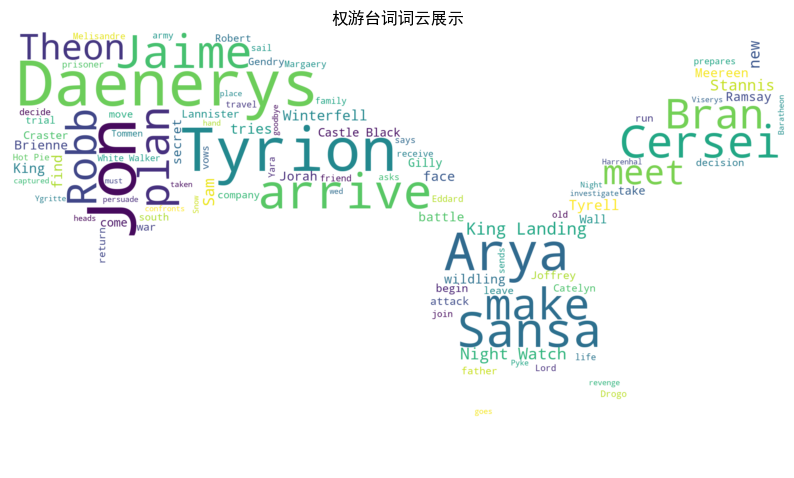

In [6]:
import wordcloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# 提示：添加中文字体支持
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif']=['simHei']

# 读取文本
with open("./dataset/desc.txt", encoding="utf-8") as f:
    s = f.read()

# 读取自定义图片
custom_mask = np.array(Image.open(r'./dargon1.jpeg'))

# 创建词云对象，设置自定义图片作为底图
wc = wordcloud.WordCloud(
    width=1000,
    height=700,
    background_color='white',
    max_words=100,
    mask=custom_mask  # 设置自定义图片作为底图
)

# 加载词云文本
wc.generate(s)

# 显示词云图
plt.figure(figsize=(10, 8))
plt.imshow(wc,interpolation='bilinear')
plt.title("权游台词词云展示")
plt.axis('off')
plt.show()


根据词云图的展示，可以看出主角Jon和龙妈Daenerys的名字很显眼，其次就是军师小恶魔Tyrion和无面者Arya,说明在这部剧中，这些人都是核心人物

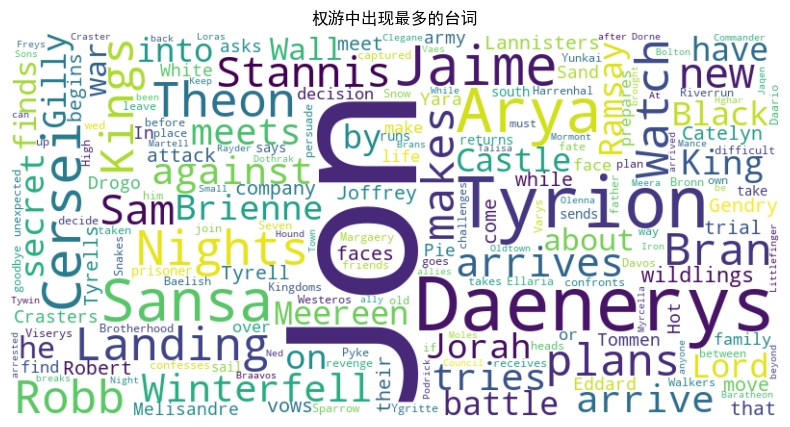

In [7]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 读取数据
top_words = pd.read_csv('./dataset/top_words.csv')

# 清洗数据，去除value列中的各种杂乱符号
top_words['value'] = top_words['value'].astype(str)  # 确保所有值都是字符串
top_words['value'] = top_words['value'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))

# 分组并计算总频次
cleaned_top_words = top_words.groupby('value')['count'].sum().reset_index()

# 将清洗后的数据转换为词云需要的字符串
word_frequencies = {row['value']: row['count'] for _, row in cleaned_top_words.iterrows()}


# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# 显示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("权游中出现最多的台词")
plt.show()


包括出现最多的台词也是指向了龙妈和Jon，Tyrion和Arya等人，更加验证了我们的推测

### 对每一季的观看人数、IMDb评分还有参与评分的人数进行分析

In [8]:
season_avgdata = pd.read_csv('./dataset/season_avgdata.csv')
season_avgdata

,season,avg(us_viewers),avg(imdb_rating),avg(total_votes)
0,1,2.515000e+06,8.980000,35616.700000
1,2,3.795000e+06,8.820000,30263.900000
2,3,4.966000e+06,8.950000,36131.600000
3,4,6.846000e+06,9.240000,39393.300000
4,5,6.880000e+06,8.740000,37860.500000
5,6,7.688000e+06,8.990000,67475.100000
6,7,1.026143e+07,9.028571,56502.428571
7,8,1.199333e+07,6.433333,177794.333333


In [9]:
from pyecharts.charts import Line
from pyecharts.globals import ThemeType
from pyecharts import options as opts
import pandas as pd

# 读取数据


x_data = x_data = season_avgdata['season'].tolist()
x_data.insert(0,0)
y_data = y_data = season_avgdata['avg(us_viewers)'].round(0).tolist()
y_data.insert(0,0)

# 创建 Line 图表对象
line = Line(init_opts={"theme": ThemeType.DARK})

line.add_xaxis(x_data)
line.add_yaxis("平均观众数", y_data, is_smooth=True,
               linestyle_opts=opts.LineStyleOpts(color='red', width=2, type_='dashed'),  # 配置折线样式
               itemstyle_opts=opts.ItemStyleOpts(color='blue', border_color='yellow', border_width=4),  # 配置图元样式
               symbol='diamond',  # 设置图元形状
               symbol_size=15,  # 设置图元大小
               )  # 设置 is_smooth=True 来显示平滑的曲线

# 设置线条样式
line.set_series_opts(
    areastyle_opts=opts.AreaStyleOpts(color='rgba(80, 255, 140, 0.7)',opacity= 0.6),  # 设置面积图透明度
    label_opts={"is_show": False}  # 设置不显示标签
)

# 设置全局图表选项
line.set_global_opts(
    title_opts=opts.TitleOpts(title="观看人数与播放季的关系",pos_top='1%',pos_left='40%'),
    xaxis_opts=opts.AxisOpts(name="播放季数"),
    yaxis_opts=opts.AxisOpts(name= "平均观众数"),
    legend_opts=opts.LegendOpts(is_show=False)  # 隐藏图例
)

# 显示图表
line.render_notebook()


由面积图反应的信息可知，随着时间推移,图标所占面积越来越大，观看该剧的人数越来越多，说明了该剧越来越火

In [10]:
# 参与评价人数和权游播放季的关系
from pyecharts.charts import Line
from pyecharts.globals import ThemeType
from pyecharts import options as opts
import pandas as pd

# 读取数据
x_data = x_data = season_avgdata['season'].tolist()
x_data.insert(0,0)
y_data = y_data = season_avgdata['avg(total_votes)'].round(0).tolist()
y_data.insert(0,0)

# 创建 Line 图表对象
line = Line(init_opts={"theme": ThemeType.DARK})

line.add_xaxis(x_data)
line.add_yaxis("平均观众数", y_data, is_smooth=False,
               linestyle_opts=opts.LineStyleOpts(color='green', width=2, type_='dashed'),  # 配置折线样式
               itemstyle_opts=opts.ItemStyleOpts(color='red', border_color='yellow', border_width=3),  # 配置图元样式
               symbol='pin',  # 设置图元形状
               symbol_size=20,  # 设置图元大小
               ) 

# 设置全局图表选项
line.set_global_opts(
    title_opts=opts.TitleOpts(title="参与评价人数与播放季的关系",pos_top='1%',pos_left='40%'),
    xaxis_opts=opts.AxisOpts(name="播放季数",
                             splitline_opts=opts.SplitLineOpts(is_show=False)  # 隐藏 x 轴网格线
                             ),
    yaxis_opts=opts.AxisOpts(name= "参与评价人数",
                             splitline_opts=opts.SplitLineOpts(is_show=True),  # 显示 y 轴网格线
                             axisline_opts=opts.AxisLineOpts(  # 配置 y 轴轴线
                             linestyle_opts=opts.LineStyleOpts(color='white')
                         )
                             ),
    legend_opts=opts.LegendOpts(is_show=False)  # 隐藏图例
)

# 显示图表
line.render_notebook()


In [11]:
# 参与评价人数和权游播放季的关系
from pyecharts.charts import Line
from pyecharts.globals import ThemeType
from pyecharts import options as opts
import pandas as pd

# 读取数据
x_data = x_data = season_avgdata['season'].tolist()
y_data = y_data = season_avgdata['avg(total_votes)'].round(0).tolist()


# 创建 Line 图表对象
line = Line(init_opts={"theme": ThemeType.DARK})

line.add_xaxis(x_data)
line.add_yaxis("平均观众数", y_data, is_smooth=False,
               linestyle_opts=opts.LineStyleOpts(color='green', width=2, type_='dashed'),  # 配置折线样式
               itemstyle_opts=opts.ItemStyleOpts(color='red', border_color='yellow', border_width=3),  # 配置图元样式
               symbol='pin',  # 设置图元形状
               symbol_size=20,  # 设置图元大小
               ) 

# 设置全局图表选项
line.set_global_opts(
    title_opts=opts.TitleOpts(title="参与评价人数与播放季的关系",pos_top='1%',pos_left='40%'),
    xaxis_opts=opts.AxisOpts(name="播放季数",
                             splitline_opts=opts.SplitLineOpts(is_show=False)  # 隐藏 x 轴网格线
                             ),
    yaxis_opts=opts.AxisOpts(name= "参与评价人数",
                             splitline_opts=opts.SplitLineOpts(is_show=True),  # 显示 y 轴网格线
                             axisline_opts=opts.AxisLineOpts(  # 配置 y 轴轴线
                             linestyle_opts=opts.LineStyleOpts(color='white')
                         )
                             ),
    legend_opts=opts.LegendOpts(is_show=False)  # 隐藏图例
)

# 显示图表
line.render_notebook()


从这个折线图中看出，前7季的剧集的参与评价的人数都在稳步上升，而到了第8季时突然上升到了最高点，根据网上公开信息显示，《权力的游戏》前7季都是逐年放送的，而第8季时隔两年才放送，同时第8季也是整个剧集系列的最后一季，因此热度突然变得的那么高也有一定的原因。

In [12]:
# 权游每季评价与播放季的关系
from pyecharts.charts import Line
from pyecharts.globals import ThemeType
from pyecharts import options as opts
import pandas as pd

# 读取数据
x_data = x_data = season_avgdata['season'].tolist()
x_data.insert(0,0)
y_data = y_data = season_avgdata['avg(imdb_rating)'].round(2).tolist()
y_data.insert(0,0)

# 创建 Line 图表对象
line = Line(init_opts={"theme": ThemeType.DARK})

line.add_xaxis(x_data)
line.add_yaxis("平均观众数", y_data, is_smooth=False,
               linestyle_opts=opts.LineStyleOpts(color='green', width=2, type_='dashed'),  # 配置折线样式
               itemstyle_opts=opts.ItemStyleOpts(color='red', border_color='yellow', border_width=3),  # 配置图元样式
               symbol='arrow',  # 设置图元形状
               symbol_size=20,  # 设置图元大小
               ) 

# 设置全局图表选项
line.set_global_opts(
    title_opts=opts.TitleOpts(title="权游每季评价与播放季的关系",pos_top='1%',pos_left='40%'),
    xaxis_opts=opts.AxisOpts(name="播放季数",
                             splitline_opts=opts.SplitLineOpts(is_show=False)  # 隐藏 x 轴网格线
                             ),
    yaxis_opts=opts.AxisOpts(name= "每季评价分数",
                             splitline_opts=opts.SplitLineOpts(is_show=True),  # 显示 y 轴网格线
                             axisline_opts=opts.AxisLineOpts(  # 配置 y 轴轴线
                             linestyle_opts=opts.LineStyleOpts(color='white')
                         )
                             ),
    legend_opts=opts.LegendOpts(is_show=False)  # 隐藏图例
)

# 显示图表
line.render_notebook()


In [13]:
from pyecharts.charts import Gauge, Timeline
from pyecharts import options as opts
import pandas as pd

# 读取数据
season_avgdata = pd.read_csv('./dataset/season_avgdata.csv')
x_data = season_avgdata['season'].tolist()
y_data = season_avgdata['avg(imdb_rating)'].round(2).tolist()

# 创建 Timeline 对象
timeline = Timeline(init_opts=opts.InitOpts(theme=ThemeType.DARK))

# 为每个季数创建一个 Gauge 图表并添加到 Timeline
for season, rating in zip(x_data, y_data):
    # 将评分转换为0-100的百分比
    # 现在是0.0作为底线，10.0作为满分，可修改让指针变化更明显
    percentage = round((rating-0 )/ 10 * 100, 1)

    gauge = (
        Gauge()
        .add(
            "",
            [("本季评分", percentage)],
            title_label_opts=opts.LabelOpts(
            font_size=28, color="white", font_family="Microsoft YaHei"
        ),
            min_=0,
            max_=100,
            split_number=5,
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(
                    color=[(0.2, "red"), (0.8, "yellow"), (1, "green")], width=30
                )
            ),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title=f"第{season}季 - 本季平均评分", pos_top='1%', pos_left='center')
        )
    )
    timeline.add(gauge, f"第{season}季")

# 设置 Timeline 配置
timeline.add_schema(
    play_interval=1000,
    is_auto_play=True,
    is_loop_play=True,
    pos_bottom="10px",
    pos_left="195px",
)

# 显示图表
timeline.render_notebook()


可以看出这部剧在第4季时候评价达到了顶峰，到了第7季也还不错，但到了第8季的评价就断崖式下跌了，可以很直观的看出这部剧烂尾了。

# 播放日期与不同季度

按照播放年份 播放季共同分析

In [14]:
season_avgdata = pd.read_csv('./dataset/season_avgdata.csv')
season_avgdata

,season,avg(us_viewers),avg(imdb_rating),avg(total_votes)
0,1,2.515000e+06,8.980000,35616.700000
1,2,3.795000e+06,8.820000,30263.900000
2,3,4.966000e+06,8.950000,36131.600000
3,4,6.846000e+06,9.240000,39393.300000
4,5,6.880000e+06,8.740000,37860.500000
5,6,7.688000e+06,8.990000,67475.100000
6,7,1.026143e+07,9.028571,56502.428571
7,8,1.199333e+07,6.433333,177794.333333


In [15]:
years_data = pd.read_csv('./dataset/years_data.csv')
years_data

,year,us_viewers,imdb_rating,total_votes
0,2011,2.515000e+06,8.980000,35616.700000
1,2012,3.795000e+06,8.820000,30263.900000
2,2013,4.966000e+06,8.950000,36131.600000
3,2014,6.846000e+06,9.240000,39393.300000
4,2015,6.880000e+06,8.740000,37860.500000
5,2016,7.688000e+06,8.990000,67475.100000
6,2017,1.026143e+07,9.028571,56502.428571
7,2019,1.199333e+07,6.433333,177794.333333


In [16]:
# 统一列名
season_columns_name = season_avgdata.columns.tolist()
new_colums_name = ['year']
for colum in season_columns_name[1:]:
    new_colums_name.append((colum))
years_data.columns = new_colums_name
years_data

,year,avg(us_viewers),avg(imdb_rating),avg(total_votes)
0,2011,2.515000e+06,8.980000,35616.700000
1,2012,3.795000e+06,8.820000,30263.900000
2,2013,4.966000e+06,8.950000,36131.600000
3,2014,6.846000e+06,9.240000,39393.300000
4,2015,6.880000e+06,8.740000,37860.500000
5,2016,7.688000e+06,8.990000,67475.100000
6,2017,1.026143e+07,9.028571,56502.428571
7,2019,1.199333e+07,6.433333,177794.333333


In [17]:
# 合并图表
years_season_data = pd.merge(season_avgdata[['season','avg(total_votes)']],years_data,on='avg(total_votes)',how='left')
years_season_data

,season,avg(total_votes),year,avg(us_viewers),avg(imdb_rating)
0,1,35616.700000,2011,2.515000e+06,8.980000
1,2,30263.900000,2012,3.795000e+06,8.820000
2,3,36131.600000,2013,4.966000e+06,8.950000
3,4,39393.300000,2014,6.846000e+06,9.240000
4,5,37860.500000,2015,6.880000e+06,8.740000
5,6,67475.100000,2016,7.688000e+06,8.990000
6,7,56502.428571,2017,1.026143e+07,9.028571
7,8,177794.333333,2019,1.199333e+07,6.433333


In [18]:
from pyecharts.charts import Bar3D
from pyecharts import options as opts
from pyecharts.globals import ThemeType

def transYearStr(x):
    return str(x)+'年'

def tranSeasonStr(x):
    return '第'+str(x)+'季'

x_axis = years_season_data['year'].apply(transYearStr).tolist()
y_axis = years_season_data['season'].apply(tranSeasonStr).tolist()
views_data = years_season_data['avg(us_viewers)'].round(0).tolist()

x_len = len(x_axis)
y_len = len(y_axis)
data = []
for i in range(x_len):
    for j in range(y_len):
        if(i == j):
            tmp = [i,j,views_data[i]]
        else:
            tmp = [i,j,0]
        data.append(tmp)

range_color = [
    '#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
    '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026'
]

# 创建 Bar3D 图表
bar3d = Bar3D(init_opts=opts.InitOpts(
    width='900px', height='500px', theme=ThemeType.DARK))

# 添加数据到 Bar3D 图表
bar3d.add(
    "",
    [[d[1], d[0], d[2]] for d in data],
    xaxis3d_opts=opts.Axis3DOpts(
        type_='category',
        data=x_axis,
        axislabel_opts=opts.LabelOpts(color="white"),  # 设置轴标签颜色为白色
    ),
    yaxis3d_opts=opts.Axis3DOpts(
        type_='category',
        data=y_axis,
        axislabel_opts=opts.LabelOpts(color="white"),  # 设置轴标签颜色为白色
    ),
    zaxis3d_opts=opts.Axis3DOpts(
        type_='value',
        axislabel_opts=opts.LabelOpts(color="white"),  # 设置轴标签颜色为白色
    ),
    grid3d_opts=opts.Grid3DOpts(is_rotate=True,rotate_speed=15,width=200,depth=80),
    shading="lambert",
)

# 设置全局配置
bar3d.set_global_opts(
    visualmap_opts=opts.VisualMapOpts(
        max_=12000000,
        range_color=range_color
    ),

)

# 渲染图表
bar3d.render_notebook()


更加直观，立体的展示，随着时间推移,图标所占面积越来越大，观看该剧的人数越来越多，说明了该剧越来越火

按照播放月份分析

In [19]:
months_data = pd.read_csv('./dataset/months_data.csv')
months_data

,month,us_viewers,imdb_rating,total_votes
0,3,4.370000e+06,8.700000,29309.000000
1,4,6.026818e+06,8.590909,48945.500000
2,5,6.080714e+06,8.496429,53808.250000
3,6,6.109333e+06,9.346667,61429.066667
4,7,9.543333e+06,8.800000,46512.333333
5,8,1.080000e+07,9.200000,63995.000000


In [20]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Grid, Line

def transMonthStr(x):
    return str(x)+'月'

x_data = months_data['month'].apply(transMonthStr).tolist()
views = months_data['us_viewers'].round(0).tolist()
imdb = months_data['imdb_rating'].round(2).tolist()
total_votes = months_data['total_votes'].round(0).tolist()

bar = (
    Bar()
    .add_xaxis(x_data)
    .add_yaxis(
        "本月份参与评价人数",
        total_votes,
        yaxis_index=0,
        color="#d14a61",
        itemstyle_opts={"barBorderRadius": [30, 30, 20, 20]}
    )
    .add_yaxis(
        "本月份总观看人数",
        views,
        yaxis_index=1,
        color="#5793f3",
        itemstyle_opts={"barBorderRadius": [30, 30, 20, 20]}
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="观看人数",
            type_="value",
            min_=0,
            max_=12000000,
            position="right",
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(color="#d14a61")
            ),
            axislabel_opts=opts.LabelOpts(formatter="{value}人次"),
        )
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            type_="value",
            name="评分",
            min_=0,
            max_=10,
            position="left",
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(color="#675bba")
            ),
            axislabel_opts=opts.LabelOpts(formatter="{value}分"),
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(opacity=1)
            ),
        )
    )
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(
            name="参与评价人数",
            min_=0,
            max_=80000,
            position="right",
            offset=100,
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(color="#5793f3")
            ),
            axislabel_opts=opts.LabelOpts(formatter="{value}人次"),
        ),
        title_opts=opts.TitleOpts(title="按播放月份综合分析"),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
    )
)


line = (
    Line()
    .add_xaxis(x_data)
    .add_yaxis(
        "本月份剧集评价",
        imdb,
        linestyle_opts=opts.LineStyleOpts(color='green', width=3, type_='dashed'),  # 配置折线样式
        itemstyle_opts=opts.ItemStyleOpts(color='red', border_color='yellow', border_width=2),  # 配置图元样式
        symbol='pin',  # 设置图元形状
        symbol_size=20,  # 设置图元大小
        yaxis_index=2,
        color="#675bba",
        label_opts=opts.LabelOpts(is_show=True),
    )
)

bar.overlap(line)
grid = Grid(init_opts=opts.InitOpts(theme=ThemeType.DARK))
grid.add(bar, opts.GridOpts(pos_left="5%", pos_right="20%"), is_control_axis_index=True)
grid.render_notebook()

综合展示，权游的剧集每季首播通常都在3月春季首播，只有第七季是七月开始的。从图可以看出，随着剧集的放送，观看的人越来越多，权游也越来越火，而且基本每个月的剧集评价分数相差不多，都属于高分作品

# 对每位导演与剧集进行分析

In [21]:
director_avgdata = pd.read_csv('./dataset/director_avgdata.csv')
director_avgdata

,directed_by,avg(imdb_rating)
0,Neil Marshall,9.600000
1,Alex Graves,9.366667
2,Matt Shakman,9.200000
3,Alik Sakharov,9.025000
4,Jack Bender,9.000000
5,Alan Taylor,9.000000
6,D. B. Weiss,9.000000
7,Daniel Minahan,8.860000
8,Daniel Sackheim,8.800000
9,Tim Van Patten,8.800000


In [22]:
# 分析不同的导演和评分的关系
from pyecharts.charts import Bar, Grid
from pyecharts.globals import ThemeType
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode

x_data = director_avgdata['directed_by'].tolist()[::-1]
y_data = director_avgdata['avg(imdb_rating)'].round(1).tolist()[::-1]

bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add_xaxis(x_data)
    .add_yaxis(
        '',
        y_data,
        category_gap='50%',
        itemstyle_opts={
        "normal": {
        "color": JsCode(
        """new echarts.graphic.LinearGradient(0, 0, 0, 1, [{
                        offset: 0,
                        color: 'rgba(0, 244, 255, 1)'
                    }, {
                        offset: 1,
                        color: 'rgba(100, 160, 167, 1)'
                    }], false)"""
                        ),
        "barBorderRadius": [30, 30, 30, 30],
        "shadowColor": "rgb(0, 160, 221)",
                    }
                },  # 设置柱形图颜色为渐变色
    )
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position='right'))    
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(name='评分'),
        title_opts=opts.TitleOpts(title='不同的导演拍摄的剧集的平均得分',pos_left='33%',pos_top="3%"),
    )
)

# 设置整体布局
grid = (
    Grid(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add(
        bar,
        grid_opts=opts.GridOpts(
            pos_right='10%',  # 将柱形图的中心位置偏向右侧
            pos_top='10%',  # 调整图表位置
            width='70%',  # 调整整体图表宽度
            height='80%',  # 调整整体图表高度
        )
    )
)

grid.render_notebook()


从柱状图可以看出，Neil Marshall导演的剧集平均得分最高，除了David Benioff & D.B.Weiss这个导演的平均得分是最低的，其他的导演导演的剧集得分都相差不多

In [23]:
#　各个导演所导演的剧集的占比
from pyecharts.charts import Pie
from pyecharts.globals import ThemeType
from pyecharts import options as opts

director_countdata = pd.read_csv('./dataset/director_countdata.csv')
x_data = director_countdata['directed_by'].tolist()
y_data = director_countdata['count'].tolist()


pie = (
    Pie(init_opts=opts.InitOpts(
            width='800px', height='600px',
            theme=ThemeType.DARK)
        )
    .add(
        '',
        [list(z) for z in zip(x_data, y_data)],
        radius=['20%', '60%'],
        center=['40%', '50%'],
        rosetype="radius",
        label_opts=opts.LabelOpts(is_show=True),
    )    
    .set_global_opts(
        title_opts=opts.TitleOpts(title='各导演所导演的剧集的占比',pos_left='33%',pos_top="5%"),
        legend_opts=opts.LegendOpts(
            type_="scroll", 
            pos_left="right",  # 调整图例位置
            pos_top="10%",
            orient="vertical"
        )
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(formatter='{b}:{c} \n ({d}%)'),
        position="outside"
    )
)

pie.render_notebook()


In [24]:
from pyecharts.charts import Pie
from pyecharts.globals import ThemeType
from pyecharts import options as opts
import pandas as pd
import random

# 读取数据
director_countdata = pd.read_csv('./dataset/director_countdata.csv')

# 将数据进行随机打乱
director_countdata = director_countdata.sample(frac=1, random_state=42).reset_index(drop=True)

# 提取 x 和 y 数据
x_data = director_countdata['directed_by'].tolist()
y_data = director_countdata['count'].tolist()

pie = (
    Pie(init_opts=opts.InitOpts(
            width='800px', height='600px',
            theme=ThemeType.DARK)
        )
    .add(
        '',
        [list(z) for z in zip(x_data, y_data)],
        radius=['20%', '60%'],
        center=['40%', '50%'],
        rosetype="radius",
        label_opts=opts.LabelOpts(is_show=True),
    )    
    .set_global_opts(
        title_opts=opts.TitleOpts(title='各导演所导演的剧集的占比',pos_left='33%',pos_top="5%"),
        legend_opts=opts.LegendOpts(
            type_="scroll", 
            pos_left="right",  # 调整图例位置
            pos_top="10%",
            orient="vertical"
        )
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(formatter='{b}:{c} \n ({d}%)'),
        position="outside"
    )
)

pie.render_notebook()


从玫瑰图可以看出，David Nutter这位导演所执导的剧集最多，占比最大，约占全部剧集的12.32%

# 对作者和剧集进行分析

In [25]:
writer_avgdata = pd.read_csv('./dataset/writer_avgdata.csv')
writer_avgdata

,written_by,avg(imdb_rating)
0,George R. R. Martin,9.200000
1,Story by: David Benioff & D. B. WeissTeleplay ...,9.100000
2,David Benioff & D. B. Weiss,8.768000
3,Vanessa Taylor,8.666667
4,Bryan Cogman,8.590909
5,Dave Hill,8.550000


In [26]:
# 分析不同的作者和剧集评分的关系
from pyecharts.charts import Bar, Grid
from pyecharts.globals import ThemeType
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode

writer_avgdata = pd.read_csv('./dataset/writer_avgdata.csv')
x_data = writer_avgdata['written_by'].tolist()[::-1]
y_data = writer_avgdata['avg(imdb_rating)'].round(1).tolist()[::-1]

bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add_xaxis(x_data)
    .add_yaxis(
        '',
        y_data,
        category_gap='50%',
        itemstyle_opts={
        "normal": {
        "color": JsCode(
        """new echarts.graphic.LinearGradient(0, 0, 0, 1, [{
                        offset: 0,
                        color: 'rgba(0, 244, 255, 1)'
                    }, {
                        offset: 1,
                        color: 'rgba(100, 160, 167, 1)'
                    }], false)"""
                        ),
        "barBorderRadius": [30, 30, 30, 30],
        "shadowColor": "rgb(0, 160, 221)",
                    }
                },  # 设置柱形图颜色为渐变色
    )
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position='right'))    
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(name='评分'),
        title_opts=opts.TitleOpts(title='不同的作者编写剧集的平均得分',pos_left='33%',pos_top="3%"),
    )
)

# 设置整体布局
grid = (
    Grid(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add(
        bar,
        grid_opts=opts.GridOpts(
            pos_right='10%',  # 将柱形图的中心位置偏向右侧
            pos_top='10%',  # 调整图表位置
            width='70%',  # 调整整体图表宽度
            height='80%',  # 调整整体图表高度
        )
    )
)

grid.render_notebook()


由图表可知，剧本本身是没有问题的，各个作者的剧集的得分都差不多（可以看到最高分就是原著作者George R.R Martin，高达9.2分）

In [27]:
writer_countdata = pd.read_csv('./dataset/writer_countdata.csv')
writer_countdata

,written_by,count
0,David Benioff & D. B. Weiss,50
1,Bryan Cogman,11
2,Dave Hill,4
3,George R. R. Martin,4
4,Vanessa Taylor,3
5,Story by: David Benioff & D. B. WeissTeleplay ...,1


In [28]:
from pyecharts.charts import Pie
from pyecharts.globals import ThemeType
from pyecharts import options as opts
import pandas as pd
import random

# 读取数据
writer_countdata = pd.read_csv('./dataset/writer_countdata.csv')

# 提取 x 和 y 数据
x_data = writer_countdata['written_by'].tolist()
y_data = writer_countdata['count'].tolist()

pie = (
    Pie(init_opts=opts.InitOpts(
            width='800px', height='600px',
            theme=ThemeType.DARK)
        )
    .add(
        '',
        [list(z) for z in zip(x_data, y_data)],
        radius=['0%', '60%'],
        center=['50%', '50%'],
        label_opts=opts.LabelOpts(is_show=True),
    )    
    .set_global_opts(
        title_opts=opts.TitleOpts(title='各作者所编写的剧集的占比',pos_left='38%',pos_top="5%"),
        legend_opts=opts.LegendOpts(
            type_="scroll", 
            pos_left="left",  # 调整图例位置
            pos_bottom="10%",
            orient="vertical"
        )
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(formatter='作者：{b} \n 编写的剧集数：{c} \n 总占比：({d}%)'),
        position="outside"
    )
)

pie.render_notebook()


可以看出，大部分剧集是由David Benioff&D.BWeiss写的，这两位也是这部剧集的总编剧。